In [1]:
#Importing dependencies
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
from flask import Flask, jsonify

# Reflect Tables into SQLAlchemy ORM

In [2]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [3]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [4]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)
# reflect the tables

In [5]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [6]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [7]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [8]:
#Finding the column names in the Measurement Table
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x11fc10a90>,
 'prcp': 0.08,
 'station': 'USC00519397',
 'tobs': 65.0,
 'date': '2010-01-01',
 'id': 1}

In [9]:
#Finding the column names in the Station Table
first_row = session.query(Station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x11fc1e1d0>,
 'elevation': 3.0,
 'latitude': 21.2716,
 'station': 'USC00519397',
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US',
 'id': 1}

In [10]:
#I printed out the data to find the value of the last date
for row in session.query(Measurement.date, Measurement.prcp).all():
    print(row)

('2010-01-01', 0.08)
('2010-01-02', 0.0)
('2010-01-03', 0.0)
('2010-01-04', 0.0)
('2010-01-06', None)
('2010-01-07', 0.06)
('2010-01-08', 0.0)
('2010-01-09', 0.0)
('2010-01-10', 0.0)
('2010-01-11', 0.01)
('2010-01-12', 0.0)
('2010-01-14', 0.0)
('2010-01-15', 0.0)
('2010-01-16', 0.0)
('2010-01-17', 0.0)
('2010-01-18', 0.0)
('2010-01-19', 0.0)
('2010-01-20', 0.0)
('2010-01-21', 0.0)
('2010-01-22', 0.0)
('2010-01-23', 0.0)
('2010-01-24', 0.01)
('2010-01-25', 0.0)
('2010-01-26', 0.04)
('2010-01-27', 0.12)
('2010-01-28', 0.0)
('2010-01-30', None)
('2010-01-31', 0.03)
('2010-02-01', 0.01)
('2010-02-03', None)
('2010-02-04', 0.01)
('2010-02-05', 0.0)
('2010-02-06', 0.0)
('2010-02-07', 0.0)
('2010-02-08', 0.0)
('2010-02-09', 0.0)
('2010-02-11', 0.0)
('2010-02-12', 0.02)
('2010-02-13', 0.01)
('2010-02-14', 0.0)
('2010-02-15', 0.0)
('2010-02-16', 0.0)
('2010-02-17', 0.0)
('2010-02-19', None)
('2010-02-20', 0.03)
('2010-02-21', 0.0)
('2010-02-22', 0.0)
('2010-02-23', 0.0)
('2010-02-24', 0.0)
('20

('2017-02-25', 0.03)
('2017-02-26', 0.0)
('2017-02-27', 0.0)
('2017-02-28', 0.0)
('2017-03-01', 1.19)
('2017-03-02', 0.73)
('2017-03-03', 0.47)
('2017-03-04', 0.0)
('2017-03-05', 0.35)
('2017-03-06', 0.0)
('2017-03-07', 0.0)
('2017-03-08', 0.0)
('2017-03-09', 0.0)
('2017-03-10', 0.0)
('2017-03-11', 0.0)
('2017-03-12', 0.0)
('2017-03-13', 0.0)
('2017-03-14', 0.0)
('2017-03-15', 0.0)
('2017-03-16', 0.0)
('2017-03-17', 0.0)
('2017-03-18', 0.0)
('2017-03-19', 0.0)
('2017-03-20', 0.0)
('2017-03-21', 0.0)
('2017-03-22', 0.0)
('2017-03-23', 0.0)
('2017-03-24', 0.02)
('2017-03-25', 0.0)
('2017-03-26', 0.0)
('2017-03-27', 0.0)
('2017-03-28', 0.0)
('2017-03-29', 0.0)
('2017-03-30', 0.0)
('2017-03-31', 0.0)
('2017-04-01', 0.0)
('2017-04-02', 0.0)
('2017-04-03', 0.0)
('2017-04-04', 0.0)
('2017-04-05', 0.0)
('2017-04-06', 0.0)
('2017-04-07', 0.0)
('2017-04-08', 0.0)
('2017-04-09', 0.0)
('2017-04-10', 0.0)
('2017-04-11', 0.0)
('2017-04-12', 0.0)
('2017-04-13', 0.0)
('2017-04-14', 0.26)
('2017-04-15'

('2017-01-31', 0.0)
('2017-02-01', 0.0)
('2017-02-02', 0.0)
('2017-02-03', 0.0)
('2017-02-04', 0.0)
('2017-02-05', 0.0)
('2017-02-06', 0.16)
('2017-02-07', 1.08)
('2017-02-08', 1.08)
('2017-02-09', 0.02)
('2017-02-10', 0.0)
('2017-02-11', 1.0)
('2017-02-12', 1.07)
('2017-02-13', 2.9)
('2017-02-14', 0.0)
('2017-02-15', 0.0)
('2017-02-16', 0.0)
('2017-02-17', 0.8)
('2017-02-18', 0.0)
('2017-02-19', 0.0)
('2017-02-20', 0.0)
('2017-02-21', 0.0)
('2017-02-22', 0.06)
('2017-02-23', 0.0)
('2017-02-24', 0.0)
('2017-02-25', 0.0)
('2017-02-26', 0.0)
('2017-02-27', 0.0)
('2017-02-28', 0.16)
('2017-03-01', 2.2)
('2017-03-02', 1.45)
('2017-03-03', 0.54)
('2017-03-04', 0.0)
('2017-03-05', 0.1)
('2017-03-06', 0.51)
('2017-03-07', 0.0)
('2017-03-08', 0.0)
('2017-03-09', 0.8)
('2017-03-10', 0.13)
('2017-03-11', 0.03)
('2017-03-12', 0.0)
('2017-03-13', 0.0)
('2017-03-14', 0.0)
('2017-03-15', 0.0)
('2017-03-16', 0.0)
('2017-03-17', 0.19)
('2017-03-18', 0.0)
('2017-03-19', 0.0)
('2017-03-20', 0.0)
('2017-

('2017-04-05', 0.07)
('2017-04-06', 0.0)
('2017-04-07', 0.0)
('2017-04-09', None)
('2017-04-10', 0.0)
('2017-04-11', 0.16)
('2017-04-12', 0.29)
('2017-04-13', 0.0)
('2017-04-14', 0.29)
('2017-04-17', None)
('2017-04-18', 0.12)
('2017-04-19', 0.0)
('2017-04-20', 0.0)
('2017-04-21', 1.05)
('2017-04-22', 0.7)
('2017-04-24', None)
('2017-04-25', 0.0)
('2017-04-26', 0.14)
('2017-04-27', 0.02)
('2017-04-28', 0.09)
('2017-04-29', 0.95)
('2017-04-30', 1.17)
('2017-05-01', 0.03)
('2017-05-02', 0.01)
('2017-05-03', 0.01)
('2017-05-04', 0.08)
('2017-05-05', 0.28)
('2017-05-06', 0.06)
('2017-05-08', 0.95)
('2017-05-09', 0.52)
('2017-05-10', 0.0)
('2017-05-12', None)
('2017-05-15', None)
('2017-05-16', 0.05)
('2017-05-17', 0.0)
('2017-05-18', 0.16)
('2017-05-19', 0.01)
('2017-05-20', 0.01)
('2017-05-22', None)
('2017-05-23', 0.11)
('2017-05-24', 0.1)
('2017-05-25', 0.07)
('2017-05-26', 0.0)
('2017-05-27', 0.0)
('2017-05-28', 0.02)
('2017-05-29', 0.0)
('2017-05-30', 0.04)
('2017-05-31', 0.0)
('2017-

('2010-11-05', 0.03)
('2010-11-06', 0.16)
('2010-11-07', 0.01)
('2010-11-08', 0.0)
('2010-11-09', 0.0)
('2010-11-10', 0.0)
('2010-11-11', 0.0)
('2010-11-12', 0.0)
('2010-11-13', 0.0)
('2010-11-14', 0.0)
('2010-11-15', 0.03)
('2010-11-16', 0.0)
('2010-11-17', 0.0)
('2010-11-18', 0.0)
('2010-11-19', 0.13)
('2010-11-20', 0.0)
('2010-11-21', 0.05)
('2010-11-22', 0.0)
('2010-11-23', 0.0)
('2010-11-24', 0.0)
('2010-11-25', 0.02)
('2010-11-26', 0.0)
('2010-11-27', 0.01)
('2010-11-28', 0.64)
('2010-11-29', 0.03)
('2010-11-30', 0.0)
('2010-12-01', 0.03)
('2010-12-02', 0.02)
('2010-12-03', 0.01)
('2010-12-04', 0.0)
('2010-12-05', 0.0)
('2010-12-06', 0.0)
('2010-12-07', 0.0)
('2010-12-08', 0.15)
('2010-12-09', 0.03)
('2010-12-10', 2.02)
('2010-12-11', 0.3)
('2010-12-12', 0.09)
('2010-12-13', 0.02)
('2010-12-14', 0.04)
('2010-12-15', 0.0)
('2010-12-16', 0.0)
('2010-12-17', 0.0)
('2010-12-18', 0.0)
('2010-12-19', 2.86)
('2010-12-20', 4.95)
('2010-12-21', 0.63)
('2010-12-22', 0.58)
('2010-12-23', 0.

('2015-11-22', 1.84)
('2015-11-23', 1.1)
('2015-11-24', 1.12)
('2015-11-25', 0.13)
('2015-11-26', 0.58)
('2015-11-27', 0.49)
('2015-11-28', 0.02)
('2015-11-29', 0.14)
('2015-11-30', 0.01)
('2015-12-02', None)
('2015-12-03', 0.03)
('2015-12-04', 0.0)
('2015-12-05', 0.0)
('2015-12-07', None)
('2015-12-08', 0.04)
('2015-12-09', 0.13)
('2015-12-10', 0.14)
('2015-12-11', 0.06)
('2015-12-12', 0.41)
('2015-12-13', 0.01)
('2015-12-14', 0.03)
('2015-12-15', 0.28)
('2015-12-16', 0.0)
('2015-12-17', 0.06)
('2015-12-18', 0.12)
('2015-12-19', 0.24)
('2015-12-20', 0.04)
('2015-12-22', None)
('2015-12-23', 0.0)
('2015-12-24', 0.0)
('2015-12-25', 0.23)
('2015-12-26', 0.15)
('2015-12-27', 0.48)
('2015-12-28', 0.05)
('2015-12-29', 0.01)
('2015-12-31', None)
('2016-01-01', 0.0)
('2016-01-02', 0.13)
('2016-01-03', 0.0)
('2016-01-05', None)
('2016-01-06', 0.0)
('2016-01-07', 0.0)
('2016-01-08', 0.0)
('2016-01-09', 0.0)
('2016-01-10', 0.0)
('2016-01-11', 0.0)
('2016-01-12', 0.0)
('2016-01-13', 0.0)
('2016-0

('2014-10-27', 0.0)
('2014-10-28', 0.13)
('2014-10-29', 0.24)
('2014-10-30', 0.28)
('2014-10-31', 0.03)
('2014-11-01', 0.12)
('2014-11-02', 0.48)
('2014-11-03', 0.12)
('2014-11-04', 0.07)
('2014-11-05', 0.03)
('2014-11-06', 0.12)
('2014-11-07', 0.01)
('2014-11-08', 0.67)
('2014-11-09', 0.01)
('2014-11-10', 0.0)
('2014-11-11', 0.0)
('2014-11-12', 0.77)
('2014-11-13', 0.0)
('2014-11-14', 0.0)
('2014-11-15', 0.95)
('2014-11-16', 0.15)
('2014-11-17', 0.0)
('2014-11-18', 0.0)
('2014-11-19', 0.0)
('2014-11-20', 0.02)
('2014-11-21', 0.0)
('2014-11-22', 0.01)
('2014-11-23', 0.0)
('2014-11-24', 0.0)
('2014-11-25', 0.21)
('2014-11-26', 0.0)
('2014-11-27', 0.0)
('2014-11-28', 0.0)
('2014-11-29', 0.05)
('2014-11-30', 0.62)
('2014-12-01', 0.0)
('2014-12-02', 0.0)
('2014-12-03', 0.41)
('2014-12-04', 1.56)
('2014-12-05', 0.04)
('2014-12-06', 0.63)
('2014-12-07', 0.01)
('2014-12-08', 0.0)
('2014-12-09', 0.0)
('2014-12-10', 0.0)
('2014-12-11', 0.21)
('2014-12-12', 0.07)
('2014-12-13', 0.01)
('2014-12-1

('2012-08-21', 0.0)
('2012-08-22', 0.0)
('2012-08-23', 0.0)
('2012-08-24', 0.0)
('2012-08-25', 0.0)
('2012-08-26', 0.0)
('2012-08-27', 0.0)
('2012-08-28', 0.04)
('2012-08-29', 0.0)
('2012-08-30', 0.0)
('2012-08-31', 0.0)
('2012-09-01', 0.0)
('2012-09-02', 0.0)
('2012-09-03', 0.0)
('2012-09-04', 0.0)
('2012-09-05', 0.01)
('2012-09-06', 0.0)
('2012-09-07', 0.03)
('2012-09-08', 0.1)
('2012-09-09', 0.0)
('2012-09-10', 0.03)
('2012-09-11', 0.0)
('2012-09-12', 0.0)
('2012-09-13', 0.0)
('2012-09-14', 0.0)
('2012-09-15', 0.0)
('2012-09-16', 0.0)
('2012-09-17', 0.0)
('2012-09-18', 0.0)
('2012-09-19', 0.03)
('2012-09-20', 0.16)
('2012-09-21', 0.08)
('2012-09-22', 0.0)
('2012-09-23', 0.02)
('2012-09-24', 0.0)
('2012-09-25', 0.0)
('2012-09-26', 0.0)
('2012-09-27', 0.0)
('2012-09-28', 0.0)
('2012-09-29', 0.0)
('2012-09-30', 0.0)
('2012-10-01', 0.0)
('2012-10-02', 0.0)
('2012-10-03', 0.0)
('2012-10-04', 0.0)
('2012-10-05', 0.0)
('2012-10-06', 0.0)
('2012-10-07', 0.01)
('2012-10-08', 0.0)
('2012-10-0

('2014-05-03', 1.14)
('2014-05-04', 0.0)
('2014-05-05', 0.03)
('2014-05-06', 0.24)
('2014-05-07', 0.31)
('2014-05-08', 0.03)
('2014-05-09', 0.23)
('2014-05-11', None)
('2014-05-12', 2.79)
('2014-05-13', 0.17)
('2014-05-14', 0.0)
('2014-05-15', 0.05)
('2014-05-16', 0.18)
('2014-05-17', 0.04)
('2014-05-18', 0.0)
('2014-05-19', 0.15)
('2014-05-20', 0.24)
('2014-05-21', 0.04)
('2014-05-22', 0.0)
('2014-05-23', 0.0)
('2014-05-24', 0.05)
('2014-05-25', 0.51)
('2014-05-26', 2.2)
('2014-05-27', 0.11)
('2014-05-28', 0.41)
('2014-05-29', 0.19)
('2014-05-30', 0.41)
('2014-06-01', 0.26)
('2014-06-02', 0.68)
('2014-06-03', 0.19)
('2014-06-04', 0.09)
('2014-06-05', 0.03)
('2014-06-06', 0.88)
('2014-06-07', 0.15)
('2014-06-08', 0.29)
('2014-06-09', 1.0)
('2014-06-10', 0.11)
('2014-06-11', 0.57)
('2014-06-12', 0.02)
('2014-06-13', 0.01)
('2014-06-14', 0.0)
('2014-06-15', 0.03)
('2014-06-16', 0.38)
('2014-06-17', 1.45)
('2014-06-18', 0.32)
('2014-06-19', 0.2)
('2014-06-20', 0.75)
('2014-06-21', 0.09)
(

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# # Calculate the date 1 year ago from the last data point in the database
last_year = dt.date(2017, 8, 23) - dt.timedelta(days = 365)
# Perform a query to retrieve the data and precipitation scores
last_12_mo = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= last_year)

Text(0, 0.5, 'Precipitation (inches)')

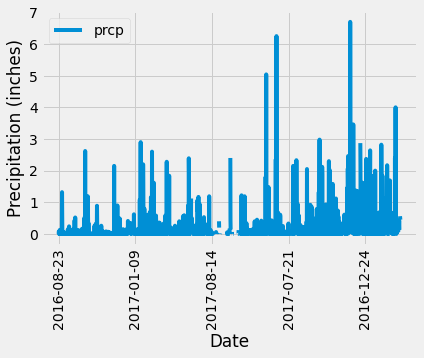

In [12]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(last_12_mo)
# Sort the dataframe by date
df.sort_values('date')
df.set_index('date', inplace = True)
# Use Pandas Plotting with Matplotlib to plot the data
df.plot(rot = 90)
plt.xlabel('Date')
plt.ylabel('Precipitation (inches)')

In [13]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [14]:
# Design a query to show how many stations are available in this dataset?
session.query(func.count(Station.station)).all()

[(9)]

In [15]:
session.query(Station.station).all()

[('USC00519397'),
 ('USC00513117'),
 ('USC00514830'),
 ('USC00517948'),
 ('USC00518838'),
 ('USC00519523'),
 ('USC00519281'),
 ('USC00511918'),
 ('USC00516128')]

In [16]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [17]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), \
              func.avg(Measurement.tobs)).filter(Measurement.station == "USC00519281").all()

[(54.0, 85.0, 71.66378066378067)]

In [23]:
date1 = dt.date(2010, 2, 23)

session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > date1, Measurement.station == "USC00519397").all()

[('2010-02-24', 0.0),
 ('2010-02-25', 0.0),
 ('2010-02-26', 0.0),
 ('2010-02-28', 0.0),
 ('2010-03-01', 0.01),
 ('2010-03-02', 0.0),
 ('2010-03-03', 0.0),
 ('2010-03-04', 0.12),
 ('2010-03-05', 0.08),
 ('2010-03-06', 0.03),
 ('2010-03-07', 0.0),
 ('2010-03-08', 0.43),
 ('2010-03-09', 0.06),
 ('2010-03-11', None),
 ('2010-03-12', 0.0),
 ('2010-03-13', 0.0),
 ('2010-03-14', 0.0),
 ('2010-03-15', 0.06),
 ('2010-03-17', 0.0),
 ('2010-03-18', 0.0),
 ('2010-03-21', 0.0),
 ('2010-03-22', 0.0),
 ('2010-03-23', 0.0),
 ('2010-03-24', 0.0),
 ('2010-03-26', None),
 ('2010-03-27', 0.0),
 ('2010-03-28', 0.0),
 ('2010-03-29', 0.0),
 ('2010-03-30', 0.0),
 ('2010-03-31', 0.0),
 ('2010-04-01', 0.0),
 ('2010-04-02', 0.01),
 ('2010-04-03', 0.17),
 ('2010-04-04', 0.15),
 ('2010-04-05', 0.27),
 ('2010-04-06', 0.01),
 ('2010-04-08', 0.0),
 ('2010-04-09', 0.01),
 ('2010-04-10', 0.0),
 ('2010-04-11', 0.01),
 ('2010-04-12', 0.01),
 ('2010-04-13', 0.0),
 ('2010-04-15', 0.0),
 ('2010-04-16', 0.01),
 ('2010-04-17'

In [ ]:
# Choose the station with the highest number of temperature observations.
session.query(Measurement.station, func.count(Measurement.tobs)).\
    group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).all()


In [ ]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tobs_hist = session.query(Measurement.station, Measurement.tobs).filter(Measurement.station == "USC00519397") \
    .filter(Measurement.date >= last_year).all()

tobs_hist_df = pd.DataFrame(tobs_hist)


tobs_hist_df.hist(column = "tobs", bins = 12),
plt.xlabel("Temperature Ovservations"),
plt.ylabel("Frequency")
plt.title("Temperature Ovservations for Station USC00519281")

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
